In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Step 2: Load data
df = pd.read_csv("Walmart.csv")

In [ ]:
print("Dataset size",df.shape)

Dataset size (6435, 8)


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
# Step 3: Preprocessing
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date')

In [ ]:
# Optional: Aggregate across all stores
df_total = df.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'Holiday_Flag': 'max',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

In [ ]:
# Step 4: EDA
print("Descriptive Statistics:")
print(df_total.describe())

Descriptive Statistics:
                      Date  Weekly_Sales  Holiday_Flag  Temperature  \
count                  143  1.430000e+02    143.000000   143.000000   
mean   2011-06-17 00:00:00  4.711342e+07      0.069930    60.663782   
min    2010-02-05 00:00:00  3.959985e+07      0.000000    30.480889   
25%    2010-10-11 12:00:00  4.488059e+07      0.000000    47.720222   
50%    2011-06-17 00:00:00  4.624390e+07      0.000000    61.051111   
75%    2012-02-20 12:00:00  4.779202e+07      0.000000    74.697333   
max    2012-10-26 00:00:00  8.093142e+07      1.000000    82.176444   
std                    NaN  5.444206e+06      0.255926    15.172792   

       Fuel_Price         CPI  Unemployment  
count  143.000000  143.000000    143.000000  
mean     3.358607  171.578394      7.999151  
min      2.672067  167.546485      6.953711  
25%      2.885367  168.408144      7.508333  
50%      3.488644  171.386189      8.150133  
75%      3.726133  174.724576      8.428578  
max      3.997

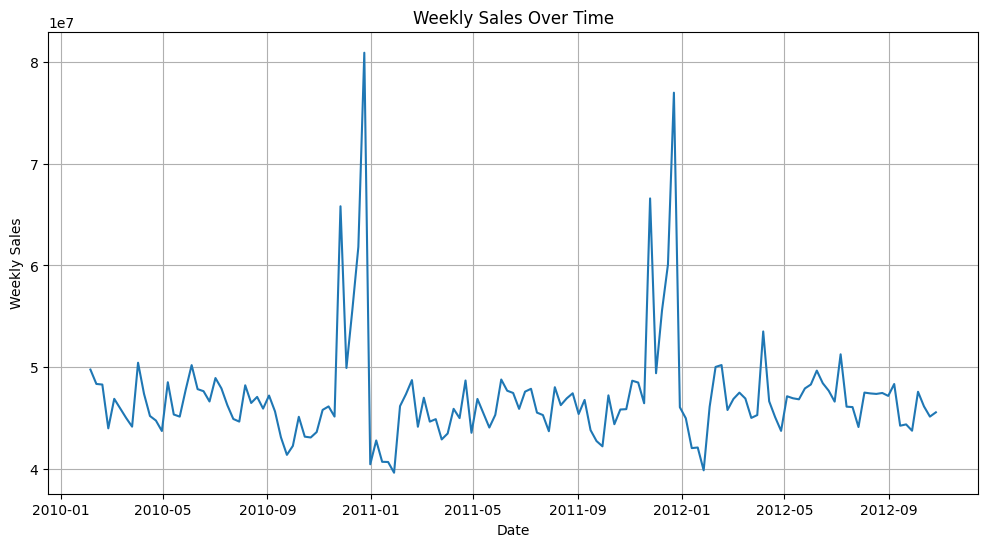

In [ ]:
# Weekly Sales over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total, x='Date', y='Weekly_Sales')
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


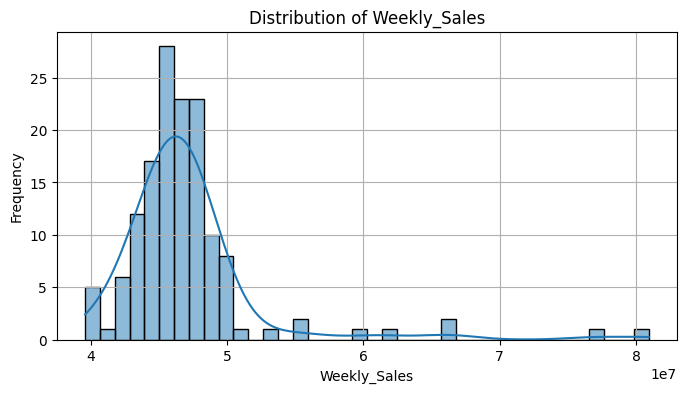

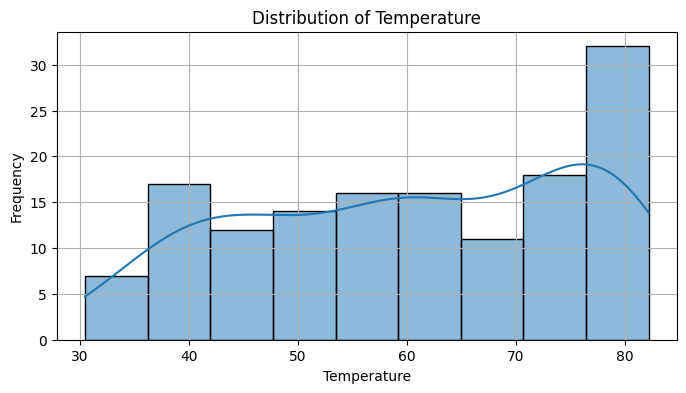

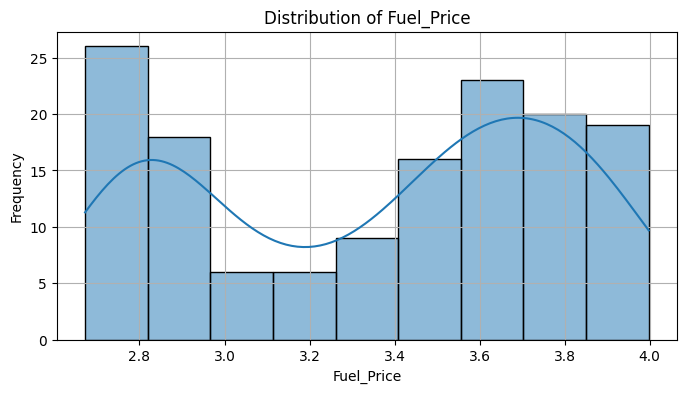

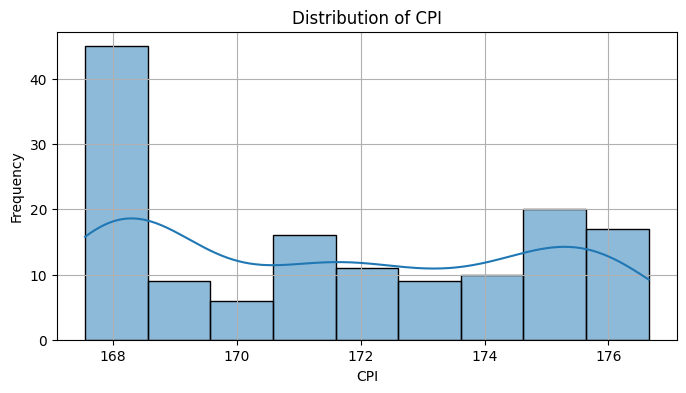

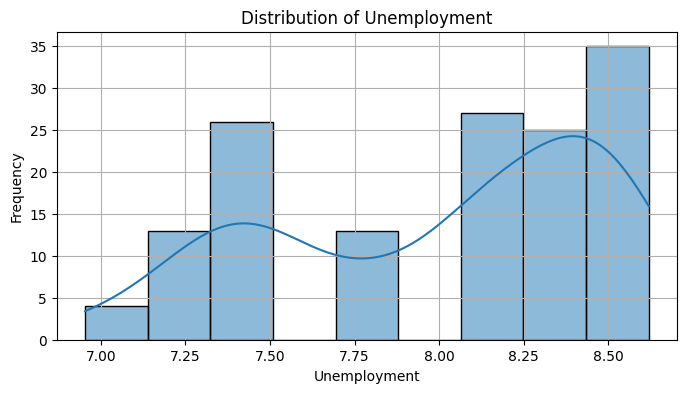

In [ ]:
# Distribution plots
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_total[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

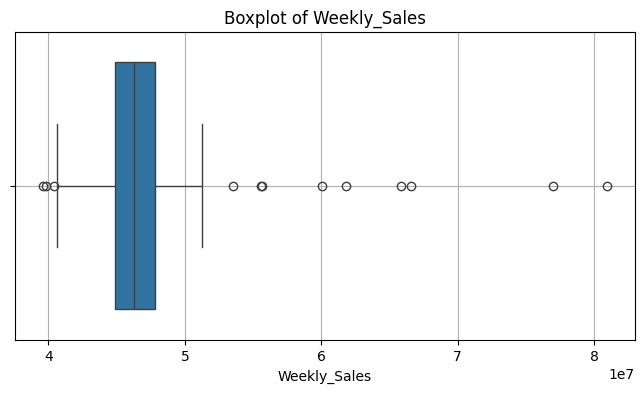

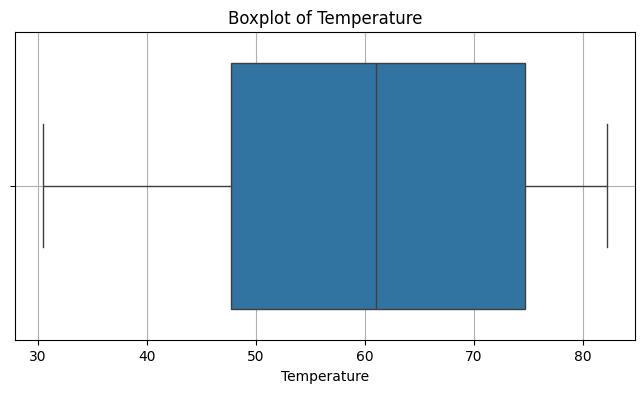

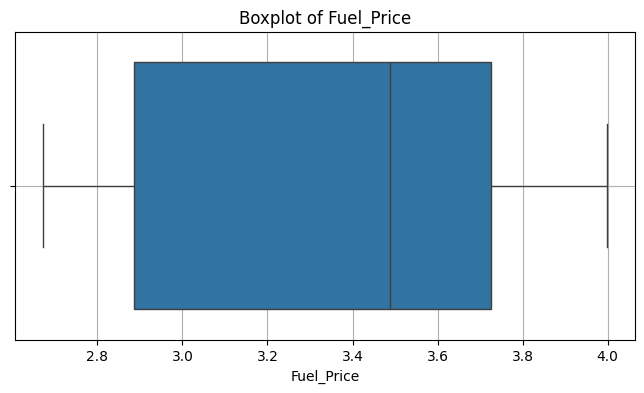

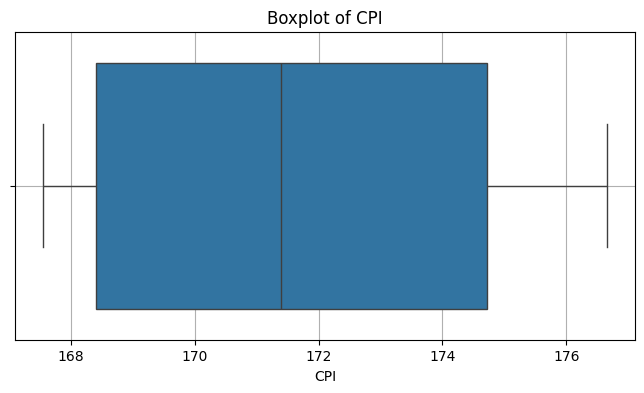

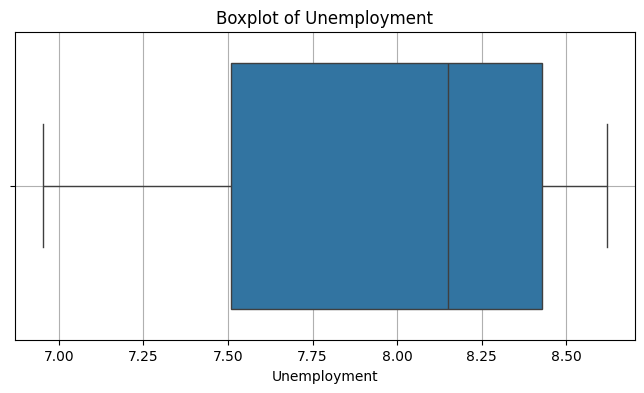

In [ ]:
# Box plots for detecting outliers
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_total[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()

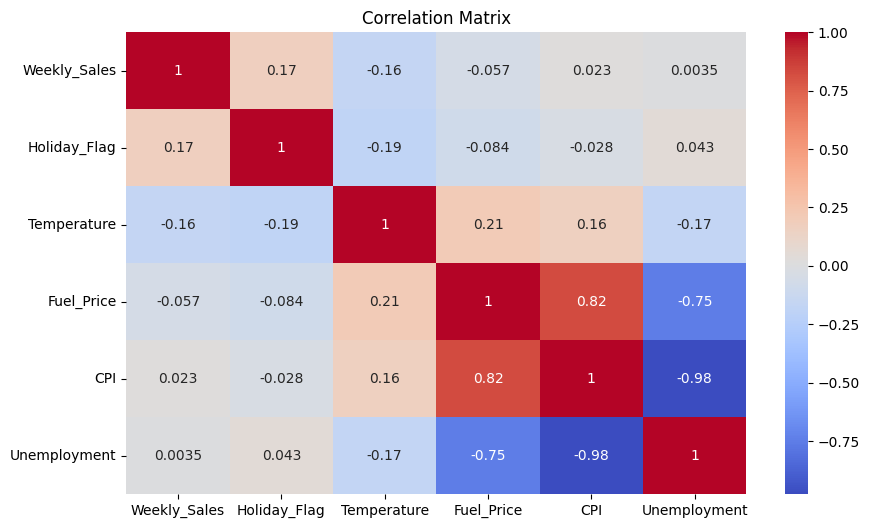

In [ ]:
# Correlation heatmap
df_cor = df_total.drop('Date', axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cor.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

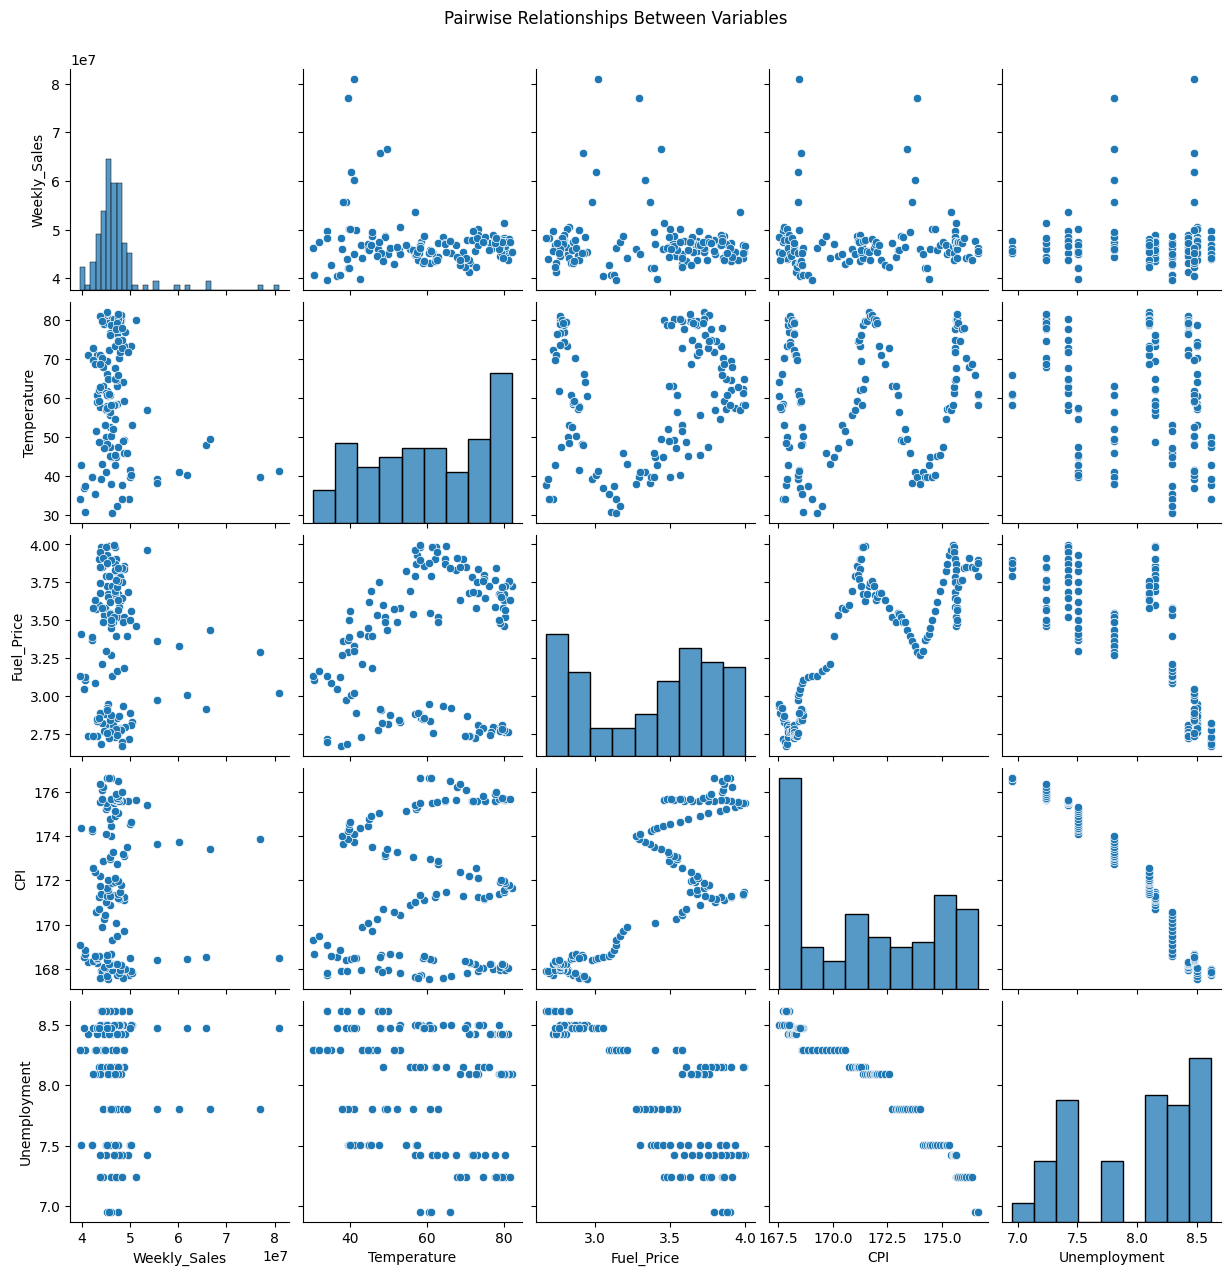

In [ ]:
# Pairplot for relationships
sns.pairplot(df_total[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.suptitle("Pairwise Relationships Between Variables", y=1.02)
plt.show()

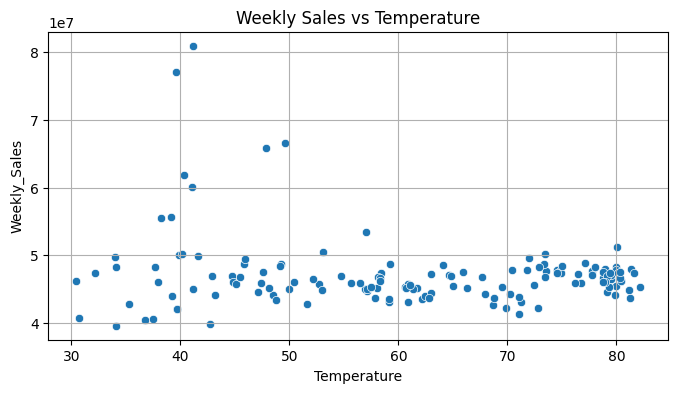

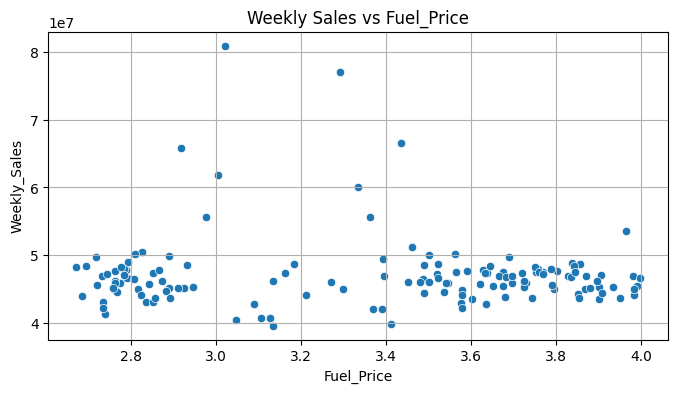

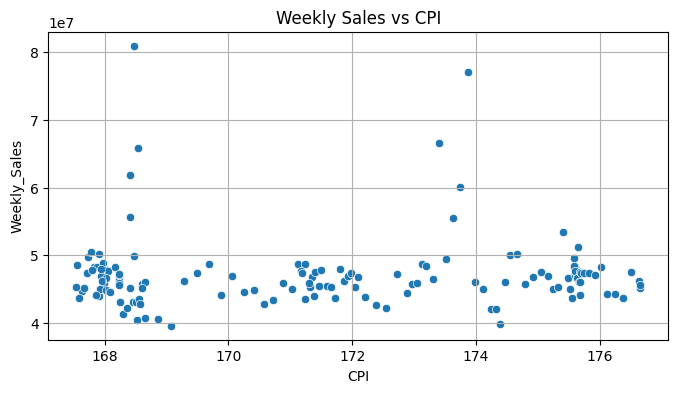

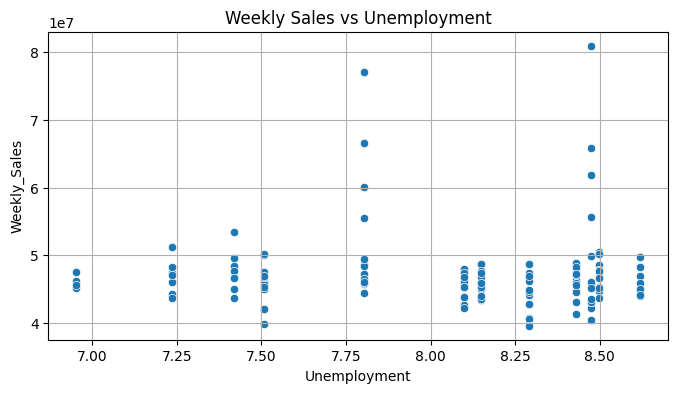

In [ ]:
# Sales vs each feature
for feature in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_total, x=feature, y='Weekly_Sales')
    plt.title(f"Weekly Sales vs {feature}")
    plt.grid(True)
    plt.show()

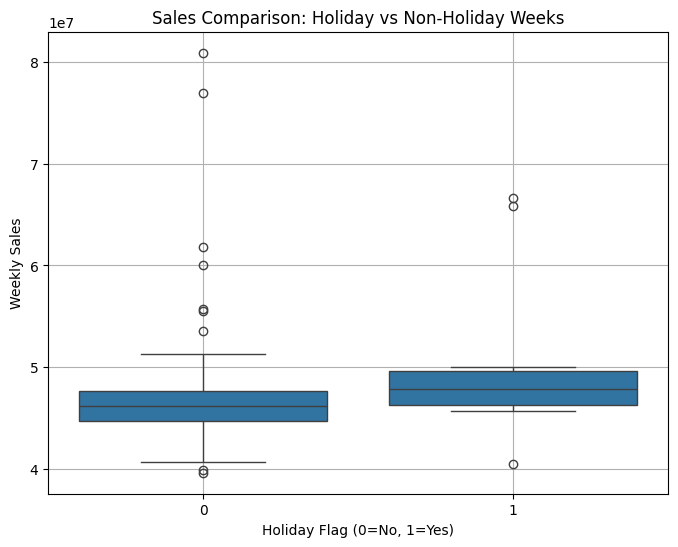

In [ ]:
# Holiday vs Non-Holiday Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_total, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Sales Comparison: Holiday vs Non-Holiday Weeks")
plt.xlabel("Holiday Flag (0=No, 1=Yes)")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

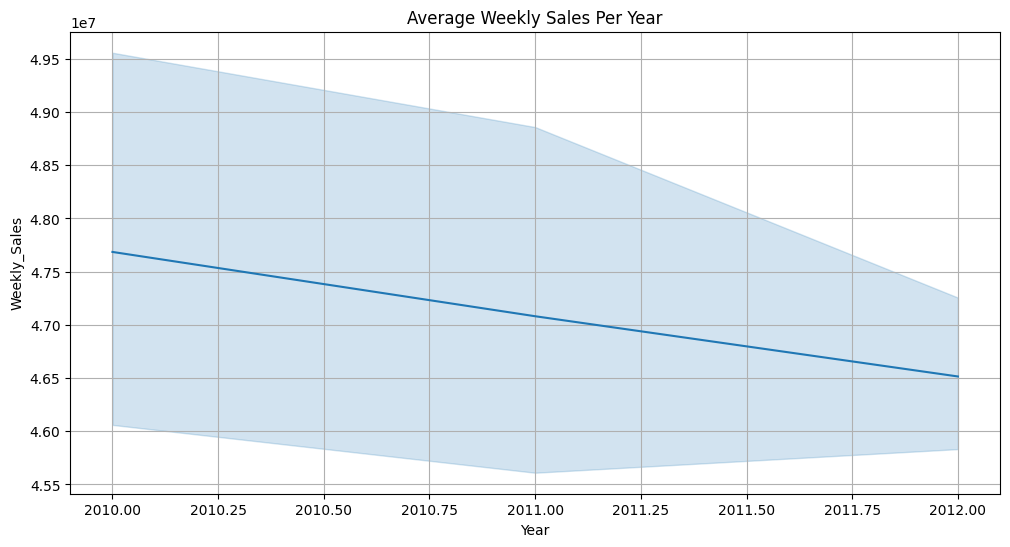

In [ ]:
# Yearly Trend
df_total['Year'] = df_total['Date'].dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total, x='Year', y='Weekly_Sales', estimator='mean')
plt.title("Average Weekly Sales Per Year")
plt.grid(True)
plt.show()

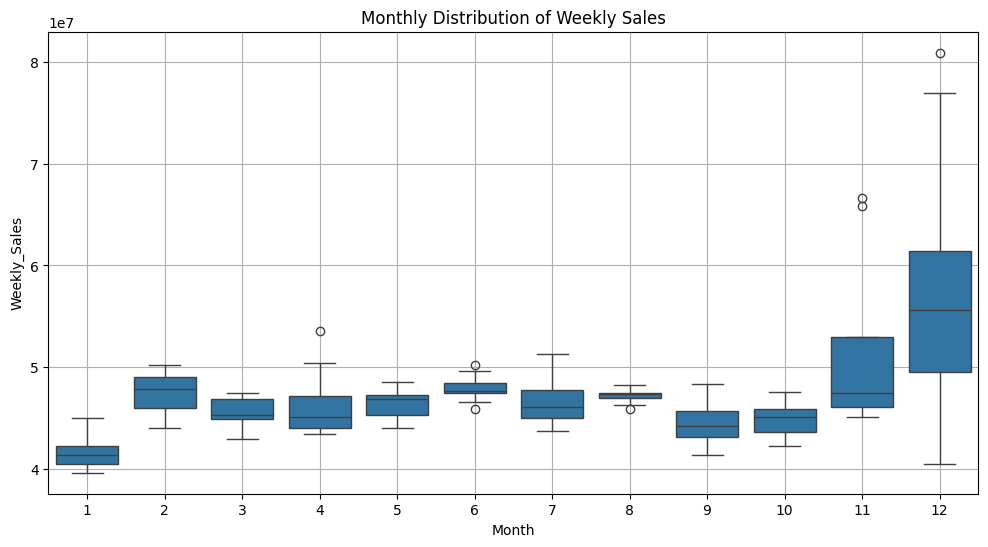

In [ ]:
# Monthly trend
df_total['Month'] = df_total['Date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_total, x='Month', y='Weekly_Sales')
plt.title("Monthly Distribution of Weekly Sales")
plt.grid(True)
plt.show()


--- Linear Regression Model Evaluation ---
MAE: 3242041.99
RMSE: 5217631.34
R-squared: 0.11

--- Linear Regression Predicted Sales for Year 2013 ---
            ds       yhat_lr
153 2013-01-06  4.511157e+07
154 2013-01-13  4.511157e+07
155 2013-01-20  4.511157e+07
156 2013-01-27  4.511157e+07
157 2013-02-03  4.511157e+07
158 2013-02-10  4.511157e+07
159 2013-02-17  4.511157e+07
160 2013-02-24  4.511157e+07
161 2013-03-03  4.511157e+07
162 2013-03-10  4.511157e+07
163 2013-03-17  4.511157e+07
164 2013-03-24  4.511157e+07
165 2013-03-31  4.511157e+07
166 2013-04-07  4.511157e+07
167 2013-04-14  4.511157e+07
168 2013-04-21  4.511157e+07
169 2013-04-28  4.511157e+07
170 2013-05-05  4.511157e+07
171 2013-05-12  4.511157e+07
172 2013-05-19  4.511157e+07
173 2013-05-26  4.511157e+07
174 2013-06-02  4.511157e+07
175 2013-06-09  4.511157e+07
176 2013-06-16  4.511157e+07
177 2013-06-23  4.511157e+07
178 2013-06-30  4.511157e+07
179 2013-07-07  4.511157e+07
180 2013-07-14  4.511157e+07
181 2013-

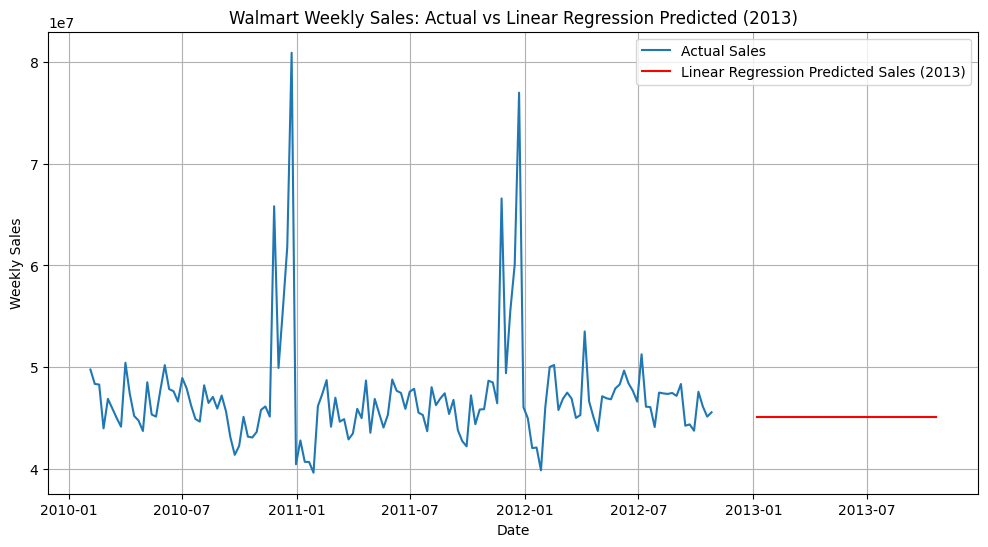

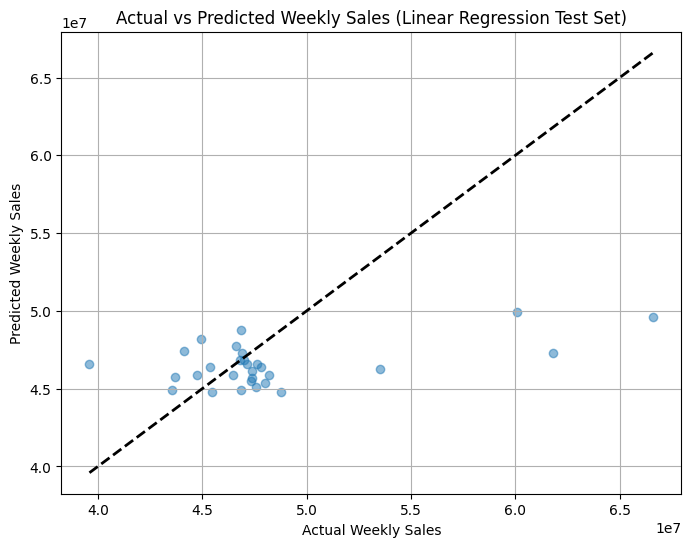

In [ ]:
# Select features and target variable for regression
features = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

X = df_total[features]
y = df_total[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)

print("\n--- Linear Regression Model Evaluation ---")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")

future_2013_dates = forecast[forecast['ds'].dt.year == 2013]['ds']
X_2013 = pd.DataFrame({col: df_total[col].iloc[-1] for col in features}, index=future_2013_dates)


# Make predictions for 2013
y_pred_2013_lr = lin_reg_model.predict(X_2013)

# Create a DataFrame for 2013 predictions
predictions_2013_lr_df = pd.DataFrame({
    'ds': future_2013_dates,
    'yhat_lr': y_pred_2013_lr
})


print("\n--- Linear Regression Predicted Sales for Year 2013 ---")
print(predictions_2013_lr_df)

# Visualize the 2013 regression prediction vs actual data
plt.figure(figsize=(12, 6))
plt.plot(df_total['Date'], df_total['Weekly_Sales'], label='Actual Sales')
plt.plot(predictions_2013_lr_df['ds'], predictions_2013_lr_df['yhat_lr'], label='Linear Regression Predicted Sales (2013)', color='red')
plt.title("Walmart Weekly Sales: Actual vs Linear Regression Predicted (2013)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of actual vs predicted sales for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales (Linear Regression Test Set)")
plt.grid(True)
plt.show()

In [ ]:
# Step 5: Prophet Forecasting
prophet_df = df_total.rename(columns={
    'Date': 'ds',
    'Weekly_Sales': 'y'
})

In [ ]:
scaler = StandardScaler()
df_total[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] = scaler.fit_transform(
    df_total[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
)

In [ ]:
# Add scaled features back to Prophet dataframe
for col in ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    prophet_df[col] = df_total[col]

# Prophet model
model = Prophet()
model.add_regressor('Holiday_Flag')
model.add_regressor('Temperature')
model.add_regressor('Fuel_Price')
model.add_regressor('CPI')
model.add_regressor('Unemployment')

model.fit(prophet_df)

# Future dataframe
future = model.make_future_dataframe(periods=52, freq='W')
# Add future values for regressors (reuse last known values)
for col in ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    future[col] = df_total[col].iloc[-1]

forecast = model.predict(future)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_13zakiy/e31447gf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_13zakiy/viqa9fw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40851', 'data', 'file=/tmp/tmp_13zakiy/e31447gf.json', 'init=/tmp/tmp_13zakiy/viqa9fw_.json', 'output', 'file=/tmp/tmp_13zakiy/prophet_model6qtun1a9/prophet_model-20250527083254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


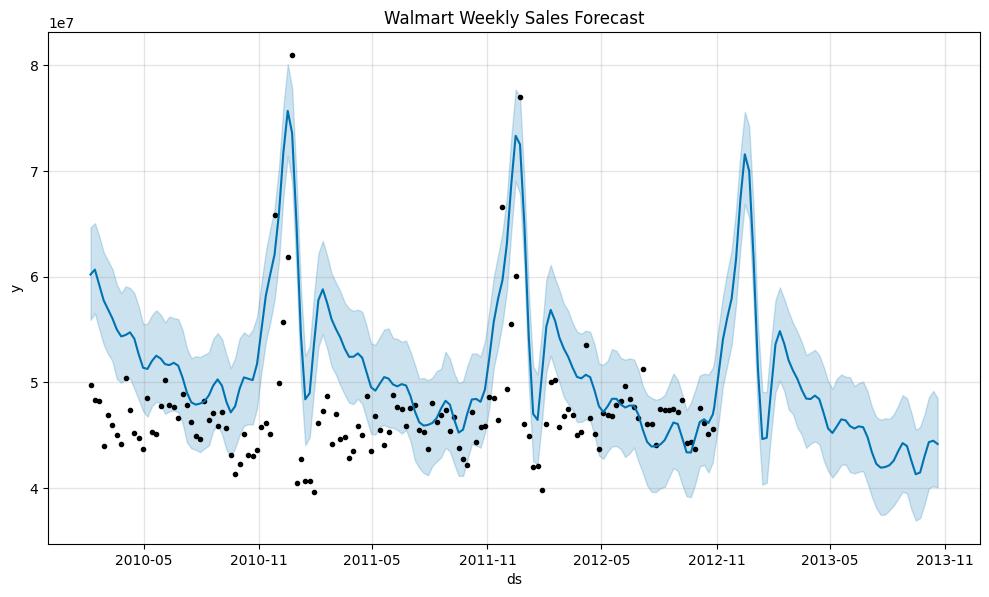

In [ ]:
# Step 6: Plot forecast
model.plot(forecast)
plt.title("Walmart Weekly Sales Forecast")
plt.show()



In [ ]:
forecast_valid = forecast.set_index('ds').join(prophet_df.set_index('ds'), rsuffix='_actual')
forecast_valid = forecast_valid.dropna(subset=['y', 'yhat'])

mae = mean_absolute_error(forecast_valid['y'], forecast_valid['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_valid['y'], forecast_valid['yhat']))

# MAPE-based Accuracy
mape = np.mean(np.abs((forecast_valid['y'] - forecast_valid['yhat']) / forecast_valid['y'])) * 100
accuracy = 100 - mape

# R² Score
r2 = r2_score(forecast_valid['y'], forecast_valid['yhat'])

# Output
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%, Approx. Accuracy: {accuracy:.2f}%")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 5536293.54, RMSE: 7136741.64
MAPE: 11.90%, Approx. Accuracy: 88.10%
R² Score: -0.7305
MAE: 5536293.54, RMSE: 7136741.64


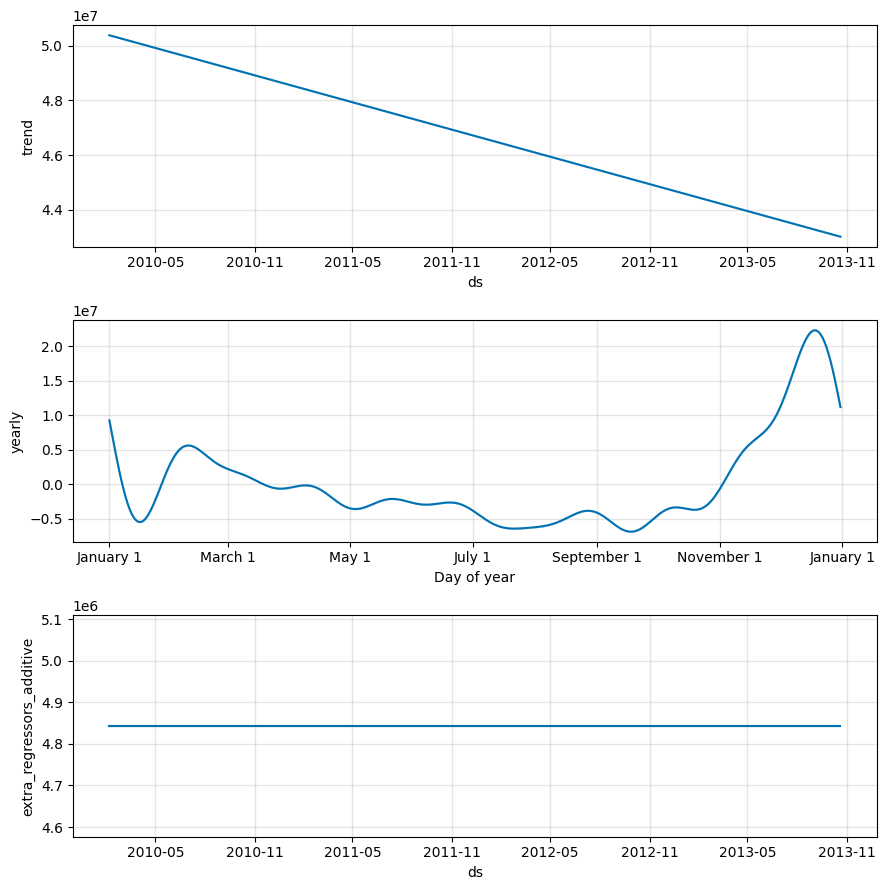

In [ ]:
# Step 8: Component plots
model.plot_components(forecast)
plt.show()

Predicted Sales Amount for Year 2013:
            ds          yhat    yhat_lower    yhat_upper
153 2013-01-06  5.126033e+07  4.674035e+07  5.551220e+07
154 2013-01-13  4.462990e+07  4.031597e+07  4.910442e+07
155 2013-01-20  4.475861e+07  4.049990e+07  4.905727e+07
156 2013-01-27  4.931696e+07  4.516201e+07  5.382110e+07
157 2013-02-03  5.360775e+07  4.907922e+07  5.776038e+07
158 2013-02-10  5.484522e+07  5.017183e+07  5.898205e+07
159 2013-02-17  5.365082e+07  4.918047e+07  5.789545e+07
160 2013-02-24  5.208025e+07  4.743861e+07  5.666860e+07
161 2013-03-03  5.111311e+07  4.699783e+07  5.560539e+07
162 2013-03-10  5.031785e+07  4.571059e+07  5.477184e+07
163 2013-03-17  4.928272e+07  4.504530e+07  5.379998e+07
164 2013-03-24  4.846560e+07  4.379871e+07  5.257258e+07
165 2013-03-31  4.841954e+07  4.419907e+07  5.282059e+07
166 2013-04-07  4.874665e+07  4.441808e+07  5.307103e+07
167 2013-04-14  4.841331e+07  4.414077e+07  5.257095e+07
168 2013-04-21  4.707761e+07  4.263595e+07  5.1459

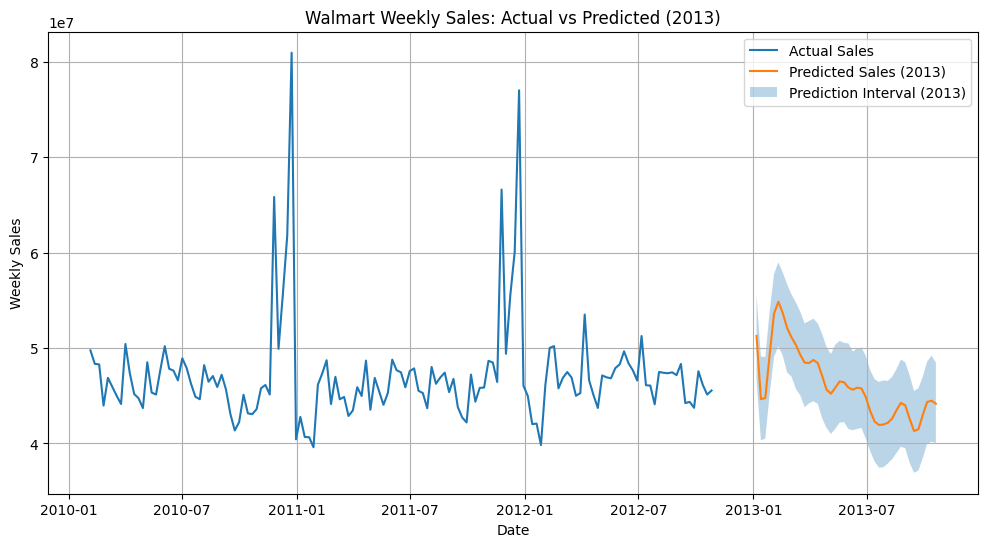


Predicted Sales Range for 2013: [36931943.95, 58982051.38]


In [ ]:
import matplotlib.pyplot as plt
# Predict sales for the year 2013
forecast_2013 = forecast[(forecast['ds'].dt.year == 2013)]

print("Predicted Sales Amount for Year 2013:")
print(forecast_2013[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Visualize the 2013 forecast
plt.figure(figsize=(12, 6))
plt.plot(df_total['Date'], df_total['Weekly_Sales'], label='Actual Sales')
plt.plot(forecast_2013['ds'], forecast_2013['yhat'], label='Predicted Sales (2013)')
plt.fill_between(forecast_2013['ds'], forecast_2013['yhat_lower'], forecast_2013['yhat_upper'], alpha=0.3, label='Prediction Interval (2013)')
plt.title("Walmart Weekly Sales: Actual vs Predicted (2013)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the range of predicted sales for 2013
predicted_sales_min_2013 = forecast_2013['yhat_lower'].min()
predicted_sales_max_2013 = forecast_2013['yhat_upper'].max()

print(f"\nPredicted Sales Range for 2013: [{predicted_sales_min_2013:.2f}, {predicted_sales_max_2013:.2f}]")


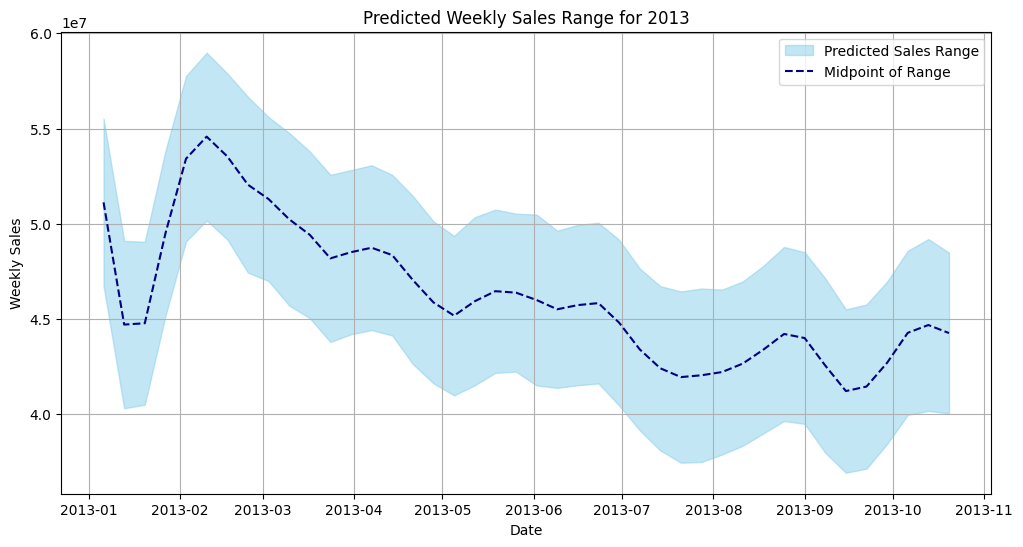

In [ ]:
# Prepare data for the chart
chart_data = forecast_2013[['ds', 'yhat_lower', 'yhat_upper']].copy()
chart_data['yhat_mean'] = (chart_data['yhat_lower'] + chart_data['yhat_upper']) / 2

# Visualize the predicted sales range for 2013
plt.figure(figsize=(12, 6))
plt.fill_between(chart_data['ds'], chart_data['yhat_lower'], chart_data['yhat_upper'], color='skyblue', alpha=0.5, label='Predicted Sales Range')
plt.plot(chart_data['ds'], chart_data['yhat_mean'], color='navy', linestyle='--', label='Midpoint of Range')

plt.title("Predicted Weekly Sales Range for 2013")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()



--- Comparison of Prophet and Linear Regression Predictions for 2013 ---
           ds  Prophet_Prediction  Linear_Regression_Prediction  \
0  2013-01-06        5.126033e+07                  4.511157e+07   
1  2013-01-13        4.462990e+07                  4.511157e+07   
2  2013-01-20        4.475861e+07                  4.511157e+07   
3  2013-01-27        4.931696e+07                  4.511157e+07   
4  2013-02-03        5.360775e+07                  4.511157e+07   
5  2013-02-10        5.484522e+07                  4.511157e+07   
6  2013-02-17        5.365082e+07                  4.511157e+07   
7  2013-02-24        5.208025e+07                  4.511157e+07   
8  2013-03-03        5.111311e+07                  4.511157e+07   
9  2013-03-10        5.031785e+07                  4.511157e+07   
10 2013-03-17        4.928272e+07                  4.511157e+07   
11 2013-03-24        4.846560e+07                  4.511157e+07   
12 2013-03-31        4.841954e+07                  4.51

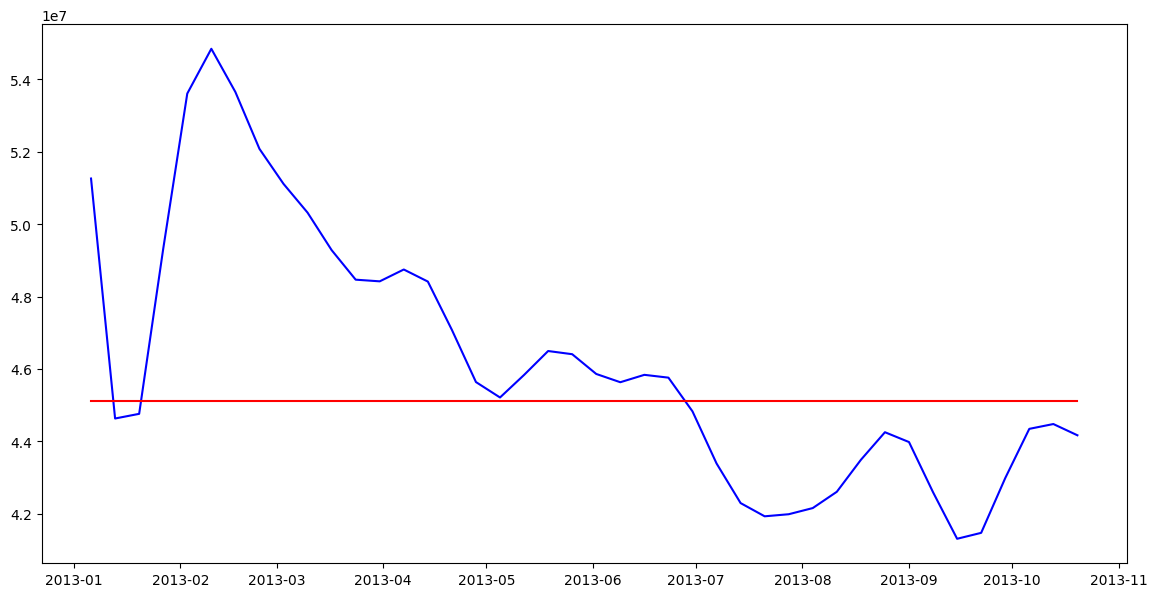

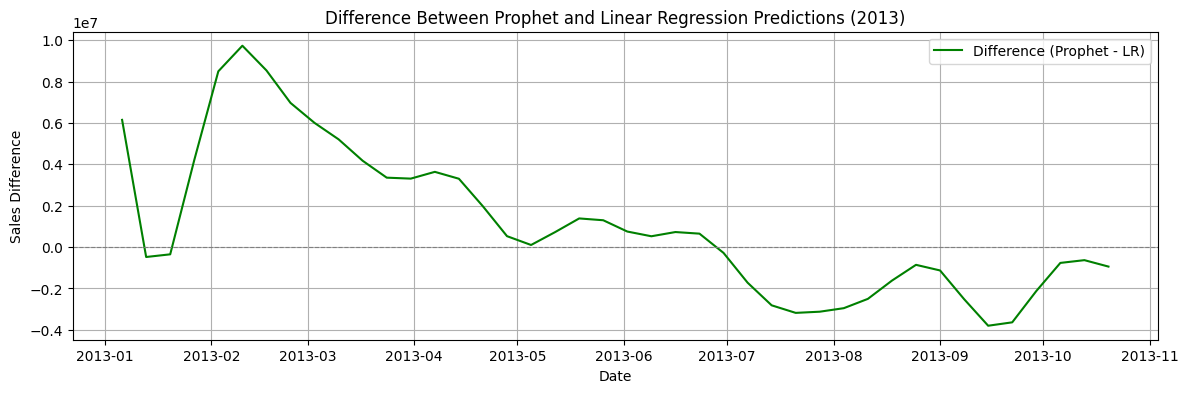

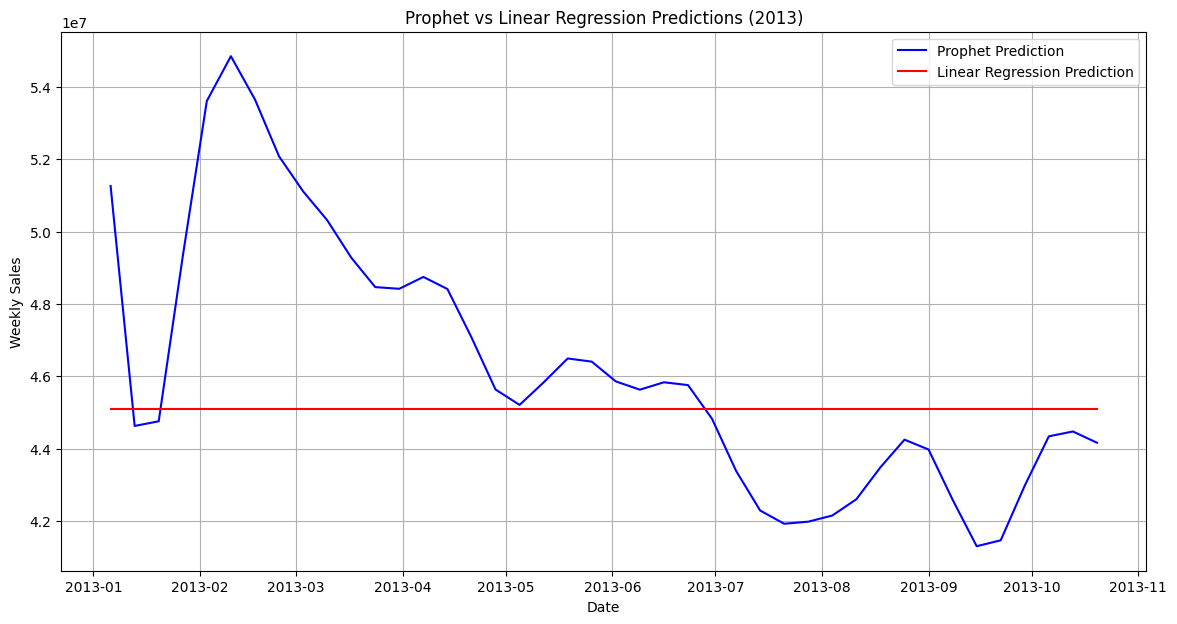

In [ ]:
# Compare Prophet and Linear Regression predictions for 2013
comparison_df = pd.merge(
    forecast_2013[['ds', 'yhat']].rename(columns={'yhat': 'Prophet_Prediction'}),
    predictions_2013_lr_df.rename(columns={'yhat_lr': 'Linear_Regression_Prediction'}),
    on='ds',
    how='inner'
)

# Calculate the difference
comparison_df['Prediction_Difference'] = comparison_df['Prophet_Prediction'] - comparison_df['Linear_Regression_Prediction']

print("\n--- Comparison of Prophet and Linear Regression Predictions for 2013 ---")
print(comparison_df)

# Visualize the two predictions and their difference for 2013
plt.figure(figsize=(14, 7))

# Plot the predictions
plt.plot(comparison_df['ds'], comparison_df['Prophet_Prediction'], label='Prophet Prediction', color='blue')
plt.plot(comparison_df['ds'], comparison_df['Linear_Regression_Prediction'], label='Linear Regression Prediction', color='red')

# Plot the difference
plt.figure(figsize=(14, 4))
plt.plot(comparison_df['ds'], comparison_df['Prediction_Difference'], label='Difference (Prophet - LR)', color='green')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Zero line
plt.title("Difference Between Prophet and Linear Regression Predictions (2013)")
plt.xlabel("Date")
plt.ylabel("Sales Difference")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the two predictions on the same chart
plt.figure(figsize=(14, 7))
plt.plot(comparison_df['ds'], comparison_df['Prophet_Prediction'], label='Prophet Prediction', color='blue')
plt.plot(comparison_df['ds'], comparison_df['Linear_Regression_Prediction'], label='Linear Regression Prediction', color='red')
plt.title("Prophet vs Linear Regression Predictions (2013)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()
